In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def logistic(x, L, k, x0):
    """
    L is the curve's maximum value
    k is the logistic growth rate or steepness of the curve
    x0 is the x value at the sigmoid's midpoint
    """
    y = L / (1 + np.exp(-k * (x - x0)))
    return y


In [20]:
L1 = 1.05
L2 = 0.45
K1 = 0.2
K2 = 0.0002
X1 = 0.175


In [21]:
# Low dose

dose1 = 50
roll1 = 10

logistic(
    roll1,
    L=(dose1 ** L1) * L2,
    k=K1 - (dose1 * K2),
    x0=dose1 * X1,
)

15.297432544910576

In [22]:
# Medium dose

dose2 = 200
roll2 = 30

logistic(
    roll2,
    L=(dose2 ** L1) * L2,
    k=K1 - (dose2 * K2),
    x0=dose2 * X1,
)

36.365658179850826

In [23]:
# High dose

dose3 = 600
roll3 = 100

logistic(
    roll3,
    L=(dose3 ** L1) * L2,
    k=K1 - (dose3 * K2),
    x0=dose3 * X1,
)

149.19485292594717

### Risk aversion exploration

In [11]:
def risk_aversion(baseline, dose):
    return baseline + ((1 - baseline) / (1 + np.exp(-0.01 * (dose - 500))))


In [12]:
def plot():
    x_line = np.arange(50, 2000, 25)
    y_high = risk_aversion(baseline=0.9, dose=x_line)
    y_med = risk_aversion(baseline=0.5, dose=x_line)
    y_low = risk_aversion(baseline=0.1, dose=x_line)
    plt.plot(x_line, y_high, '--', color='green', label="risk aversion = 0.9")
    plt.plot(x_line, y_med, '--', color='blue', label="risk aversion = 0.5")
    plt.plot(x_line, y_low, '--', color='red', label="risk aversion = 0.1")
    plt.xlabel('Dose (MME)')
    plt.ylabel('Decision Threshold')
    plt.ylim(0, 1.1)
    plt.legend()

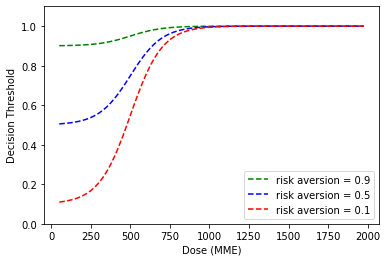

In [13]:
plot()

### OD use pause exploration

Simple version with a maximum delay scaled by user risk factors

In [63]:
external_risk = 0.1
internal_risk = 0.1
rand = 1

post_OD_use_pause = (
                        (5 * 100)
                        - (5 * 100 * external_risk * internal_risk)
                    ) * rand
print(post_OD_use_pause / 100)

4.95


More complex version with a logistic function

In [55]:
def use_pause(risk):
    t = (30 * 100) / (1 + np.exp(-10 * (2 - risk - 1.75)))
    return t / 100

In [56]:
use_pause(1)

0.016583359107707987

In [57]:
def plot():
    x_line = np.arange(0.05, 2, 0.01)
    y_line = use_pause(x_line)
    plt.plot(x_line, y_line)
    plt.xlabel('Combined Risk')
    plt.ylabel('Use Pause (Days)')

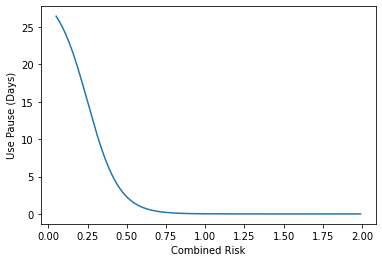

In [58]:
plot()

Another complex version using exponential decay

In [124]:
def use_pause_decay(risk):
    a = 60 * 100
    r = -0.999
    y = a * (1 + r) ** risk
    return y / 100



In [125]:
use_pause_decay(1.8)

0.00023886430233209866

In [126]:
use_pause_decay

<function __main__.use_pause_decay(risk)>

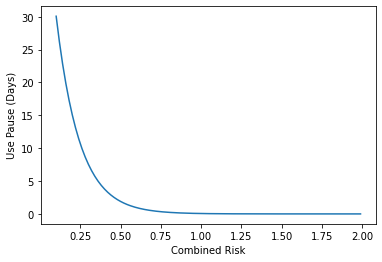

In [128]:
def plot():
    x_line = np.arange(0.1, 2, 0.01)
    y_line = use_pause_decay(x_line)
    plt.plot(x_line, y_line)
    plt.xlabel('Combined Risk')
    plt.ylabel('Use Pause (Days)')

plot()

### OD dose reduction exploration

Zero-intercept linear model based on combined risk. 

At risk=0, user decreases dose by 50%. Therefore, intercept is 0.5.

At risk=2, user does not decrease dose at all. Function should return 1.

Therefore, slope = 0.5 / 2

In [2]:
def OD_dose_reduction(risk):
    intercept = 0.5
    slope = 0.25
    dose_reduction = risk * slope + intercept
    return dose_reduction


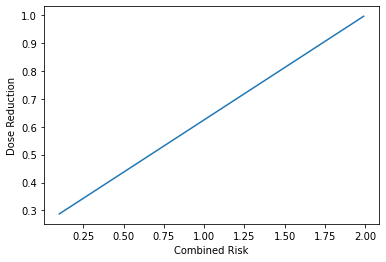

In [3]:
def plot():
    x_line = np.arange(0.1, 2, 0.01)
    y_line = OD_dose_reduction(x_line)
    plt.plot(x_line, y_line)
    plt.xlabel('Combined Risk')
    plt.ylabel('Dose Reduction')

plot()